<div style="text-align: center; font-size: 2em; color: lightblue; font-weight: bold;"> Wellbeing at Trinity Christian College: A Machine Learning Analysis of Survey Data </div>

<span style="color: #4682B4; font-weight: bold;">1. Introductory paragraph</span>

Trinity Christian College is a small private liberal arts college in Palos Heights, Illinois known for its close knit community, strong academic programs, and faith and service. They invited students, faculty, and staff to take part in a voluntary study to aim to understand the overall wellbeing on Trinity's campus. The survey asked students about their mental health, disabilities, how involved they are in campus activities, and whether they participate in events. Faculty and staff answered another set of questions giving their perspectives on the overall wellbeing of the college community. With this we will be able to answer the question: **Which factors on campus  are linked to overall wellbeing in Trinity’s students, faculty, and staff?** This project will first give an overview of the people who took the survey and their basic demographics. It will look at how mental health and disabilities relate to wellbeing and it will examine how participating in campus activities influences overall wellbeing at Trinity. By looking at all these factors together we can better understand what helps students, faculty, and staff feel their best and succeed as individuals and as a community.

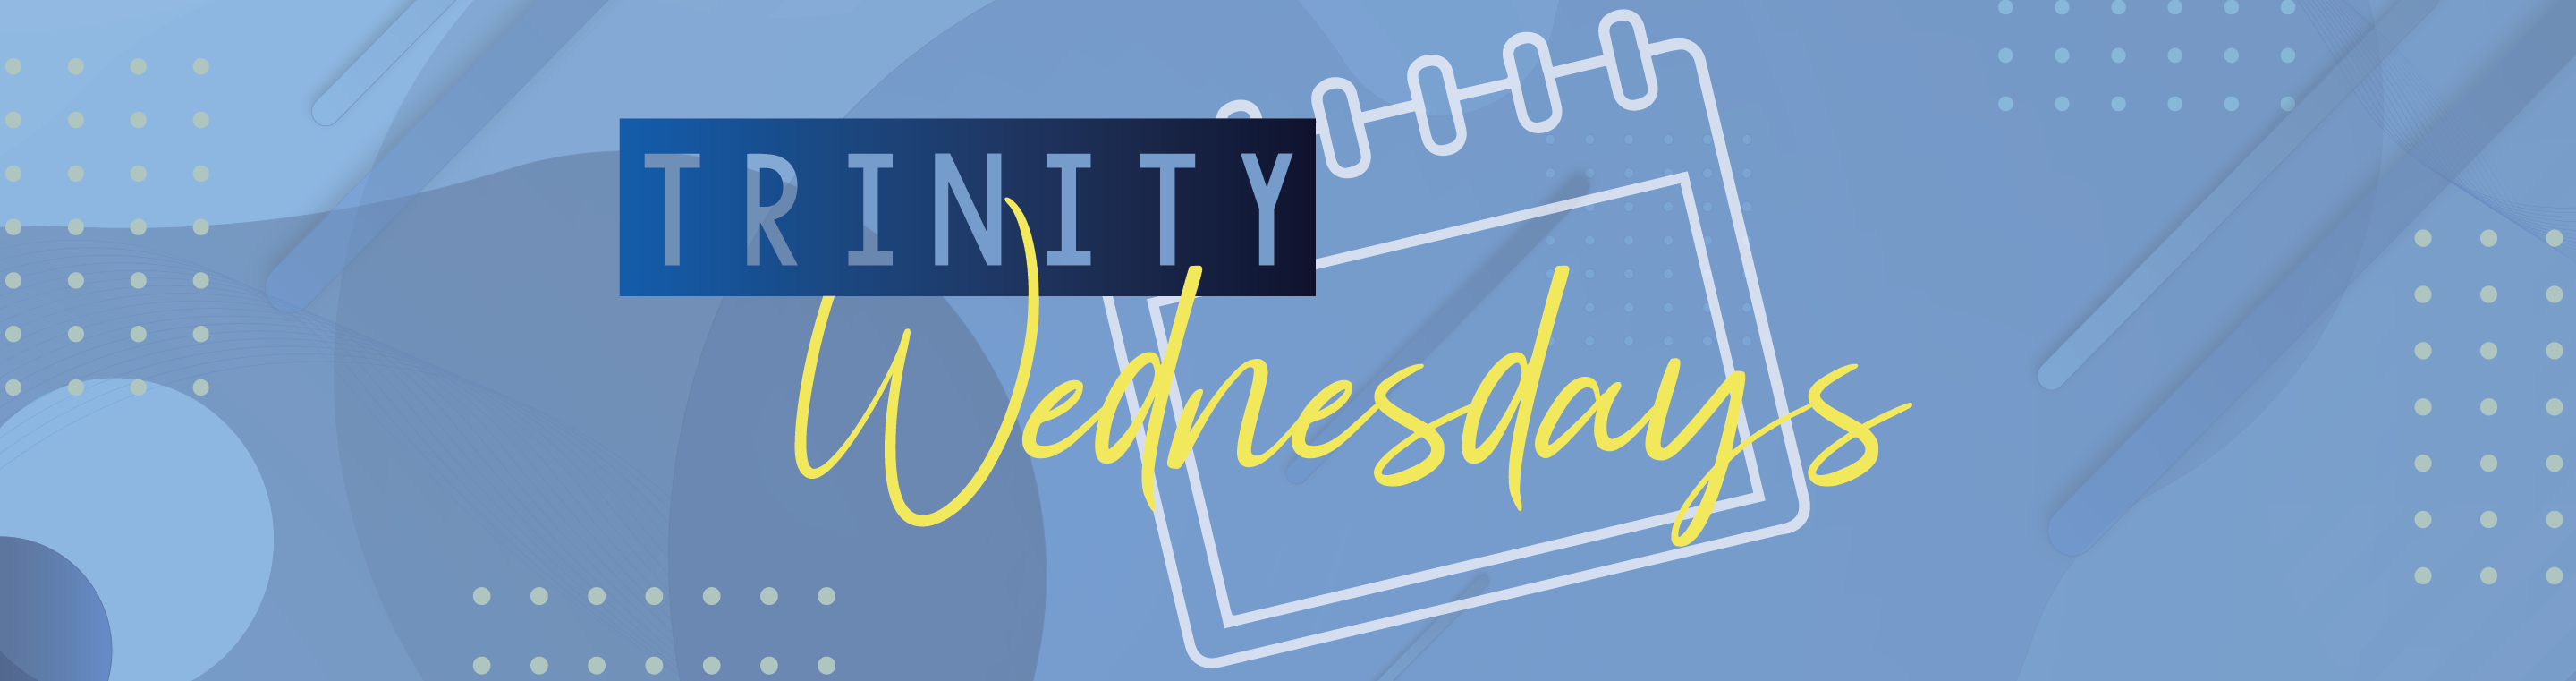

<span style="color: #4682B4; font-weight: bold;">2. Data source information</span>

The data for this study comes from surveys administered to students, faculty, and staff at Trinity Christian College by Dr. Jessica Clevering and her co-investigators. Participants voluntarily shared information about their demographics, wellbeing, participation in campus activities, and opinions about institutional wellbeing. The data collection process is considered reliable and trustworthy because it follows ethical guidelines under the supervision of the college’s Institutional Review Board which makes sure that all responses are anonymous and confidential. This helps protect participants and adds credibility to the dataset. For students, the dataset includes detailed demographic information, self-reported measures of wellbeing, and records of involvement in a variety of campus activities. For faculty and staff, it captures their perspectives on institutional wellbeing, including aspects related to campus culture, support, and engagement. Together, this information provides a broad and detailed view of the experiences and wellbeing of different groups within the college community. While the dataset is quantitative qualitative responses could offer insight into individual experiences and perceptions. The dataset overall contains the perfect information needed to study trends in wellbeing and engagement at Trinity Christian College. It allows for comparisons across students, faculty, and staff and provides a solid foundation for understanding how different groups experience and contribute to the wellbeing of the college community.

We added our dataset to the notebook and imported it using pandas read_csv() method so that we could view and work with the data.

In [3]:
import pandas as pd
data = pd.read_csv('TrinityWellbeingData.csv')
data

,"Informed Consent Information Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on institutional wellbeing. It will likely take about 15 minutes to complete the survey. The risks associated with this research are no greater than what you may encounter in everyday life. There are no anticipated personal benefits of participating in this research (other than the chance to win a Visa gift card). Participating in this research is completely voluntary. You may skip any questions. You will not be penalized in any way if you choose not to participate. Your participation in this research is anonymous. IP addresses will not be downloaded, and names will not be collected. If you choose to submit your name for the Visa gift card drawing, your name will not be connected to data. All data will be kept safe in password-protected institutional cloud drives. If you have any questions, you may contact Dr. Jessica Clevering at 708-239-3962 or Jessica.Clevering@trnty.edu. You may also contact Trinity Christian College’s human subjects review board at IRB@trnty.edu. By clicking the box below you acknowledge that you are at least 18 years old and have read and understood the information provided in this consent form.",How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,...,The college has structures and practices so as to be able to sustain itself.,The college has structures and practices that allow it to accomplish its goal.,Everyone is satisfied with the way things are in our college.,Everyone thinks that this college is a good community to be a part of.,Each person has a sense of belonging in the college.,There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.,Our college’s shared purpose or mission is clear to everyone.,Our college contributes to the world to make it a better place.,Everyone is needed for the college to fulfil its goals and purposes.,Our college is able to do more with everyone together than we could individually.
0,I know that being in this study is voluntary a...,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I know that being in this study is voluntary a...,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I know that being in this study is voluntary a...,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I know that being in this study is voluntary a...,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I know that being in

<span style="color: #4682B4; font-weight: bold;">3. Data cleaning</span>

I now went ahead and used **"data.info()"** because it shows a summary of the dataset. This will include things such as column names, data types, and any missing values. This makes us more familar with what we will be working with

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
data.isnull().sum()

Informed Consent Information  Principal Investigator: Dr. Jessica Clevering Co-Investigators: Myleigh Halmon, Gianna Rizzone, and Wynter O’SullivanFor Students: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, questions about disabilities and mental health, measures of wellbeing, participation in campus activities, and use of Wellbeing Wednesdays. It will likely take about 15 minutes to complete the survey.For Faculty and Staff: You are being invited to participate in research to better understand wellbeing among Trinity students, faculty, and staff. The data will be used for institutional assessment and to explore future wellbeing interventions. Questions will include things like basic demographic questions, measures of wellbeing, and your view on inst

Above you can see that we used **"data.isnull().sum()"** this checks for missing values in the dataframe . The **isnull()** part marks each cell as True if it is missing and False if it is not. **The sum()** part adds up the True values for each column, showing the total number of missing values per column.

In [15]:
import pandas as pd
data_clean = data[data['Are you a student, staff member, or faculty member at Trinity?'].notna()]

roles = ['Student', 'Staff', 'Faculty']
role_dfs = {
    role: data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == role].copy()
    for role in roles
}

In this case I decided to split the dataset into three separate groups those being Students, Staff, and Faculty because some survey questions are only relevant to certain groups. To make sure the data was clean, I first removed any rows where the role question was left blank using **notna()** since working with missing values could cause errors when processing the text. After that, I filtered the cleaned dataset into three separate datasets this approach will help me analyze each group making sure that the responses I look at are relevant helping improve the accuracy and clarity of the analysis.

<span style="color: #4682B4; font-weight: bold;">Exploratory Data Analysis (EDA)</span>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ssang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


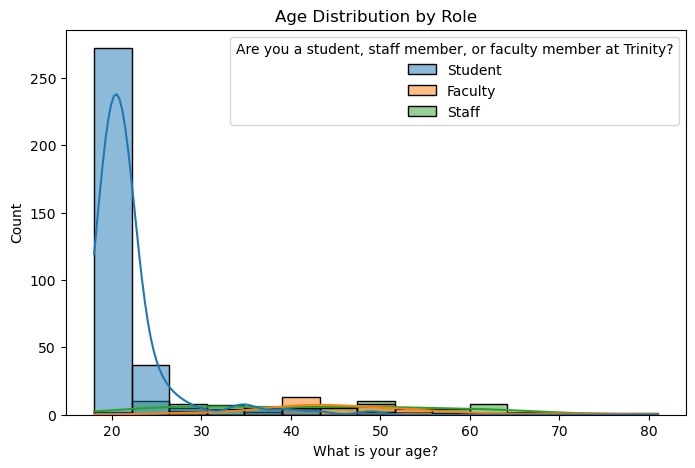

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data=data_clean, x="What is your age?", hue='Are you a student, staff member, or faculty member at Trinity?', bins=15, kde=True)
plt.title("Age Distribution by Role")
plt.show()

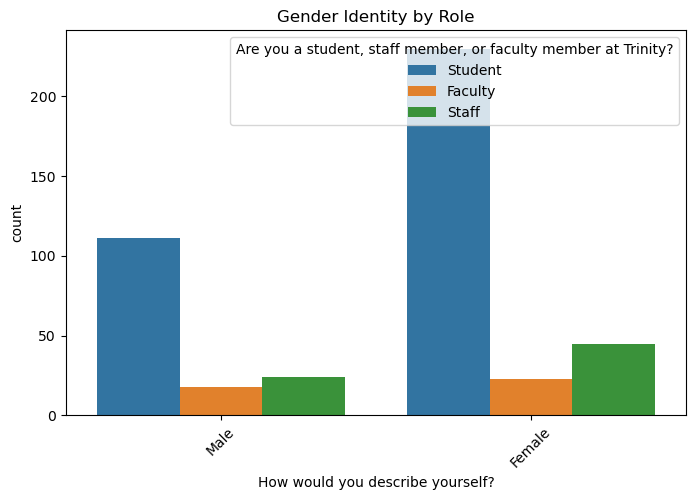

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=data_clean, x="How would you describe yourself?", hue='Are you a student, staff member, or faculty member at Trinity?')
plt.title("Gender Identity by Role")
plt.xticks(rotation=45)
plt.show()

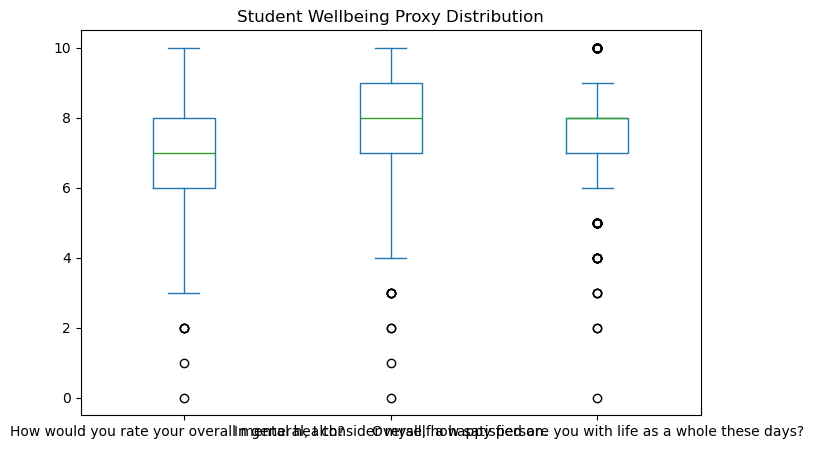

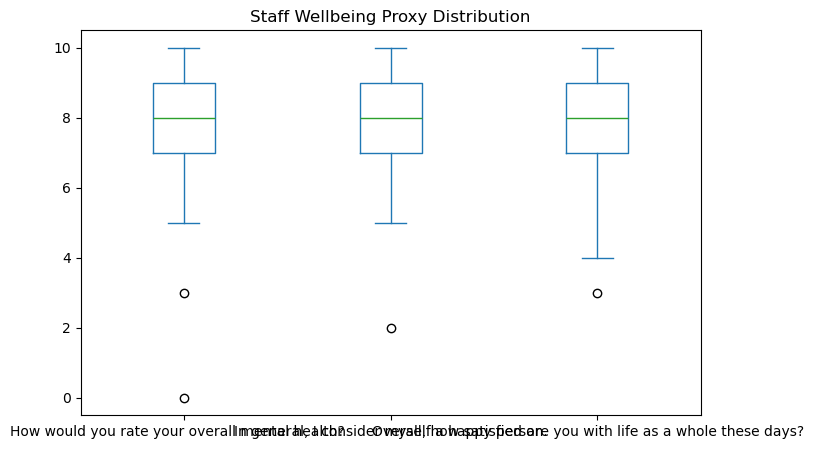

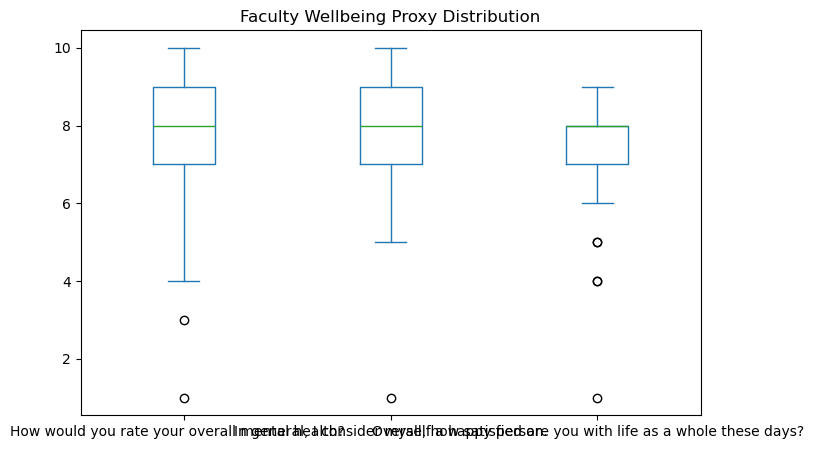

In [ ]:
wellbeing_vars = [
    "How would you rate your overall mental health? \xa0\xa0",
    "In general, I consider myself a happy person.",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0"
]

for role, df in role_dfs.items():
    df[wellbeing_vars] = df[wellbeing_vars].apply(pd.to_numeric, errors='coerce')
    df[wellbeing_vars].plot(kind='box', title=f"{role} Wellbeing Proxy Distribution", figsize=(8,5))
    plt.show()


<span style="color: #4682B4; font-weight: bold;">Correlation Analysis</span>

--- Student Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.658041   
Overall, how satisfied are you with life as a w...                                           0.615046   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.658041   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.620448   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rat

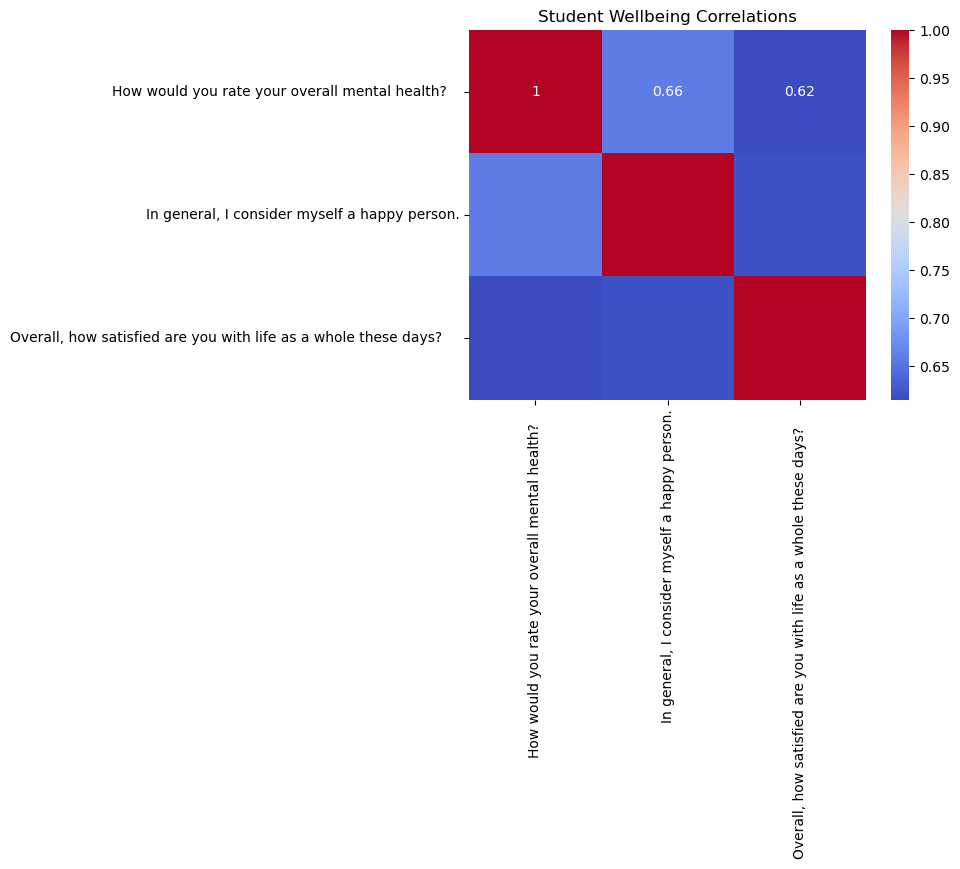

--- Staff Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.740094   
Overall, how satisfied are you with life as a w...                                           0.661310   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.740094   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.601699   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rate 

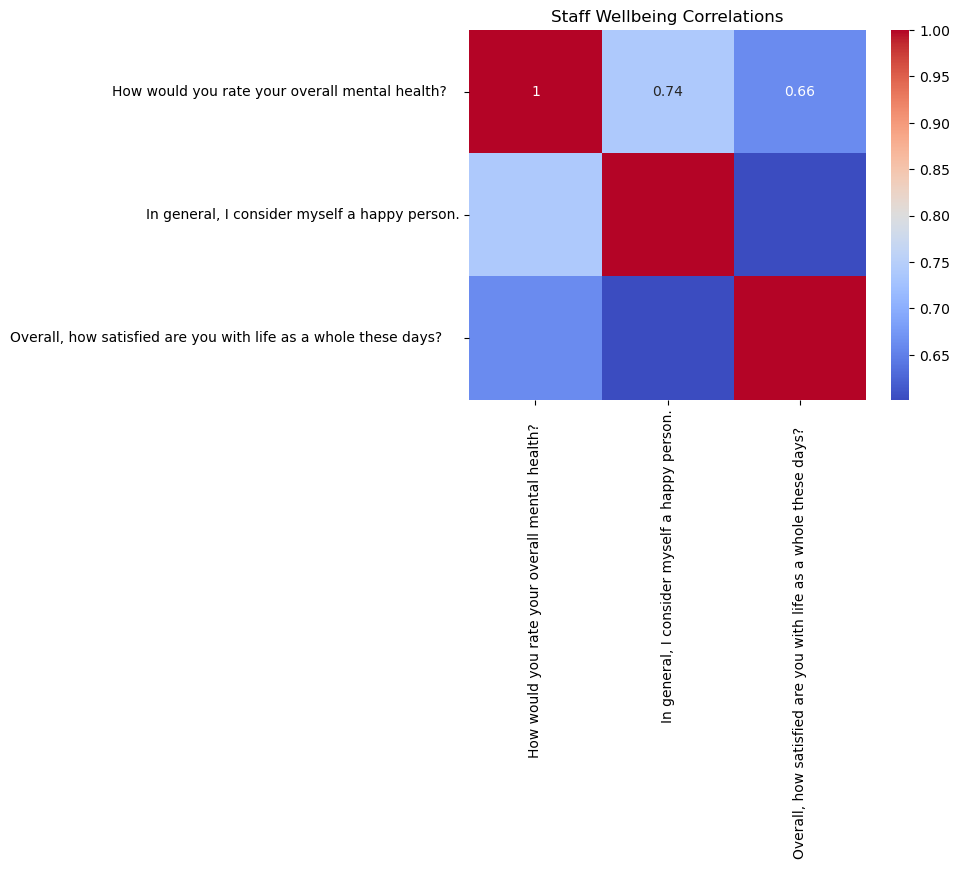

--- Faculty Correlation Matrix ---
                                                    How would you rate your overall mental health?     \
How would you rate your overall mental health?                                               1.000000   
In general, I consider myself a happy person.                                                0.571153   
Overall, how satisfied are you with life as a w...                                           0.762853   

                                                    In general, I consider myself a happy person.  \
How would you rate your overall mental health?                                           0.571153   
In general, I consider myself a happy person.                                            1.000000   
Overall, how satisfied are you with life as a w...                                       0.787378   

                                                    Overall, how satisfied are you with life as a whole these days?      
How would you rat

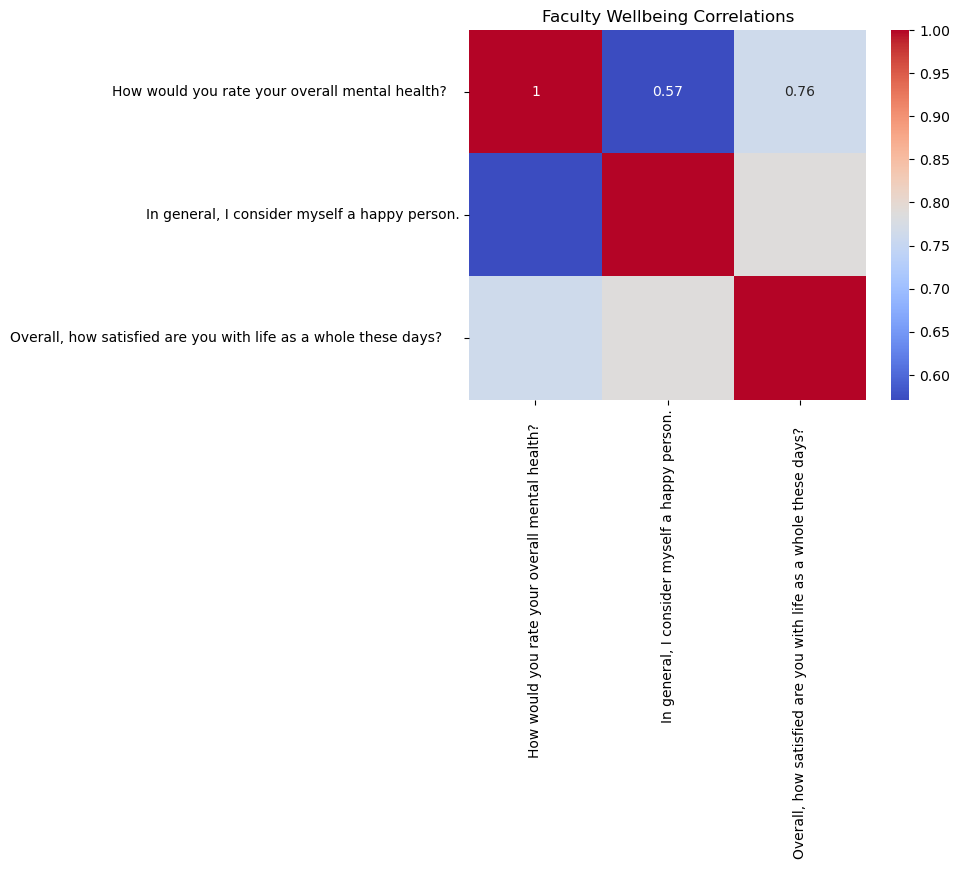

In [17]:
for role, df in role_dfs.items():
    corr = df[wellbeing_vars].corr()
    print(f"--- {role} Correlation Matrix ---")
    print(corr)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"{role} Wellbeing Correlations")
    plt.show()

<span style="color: #4682B4; font-weight: bold;">Feature Selection</span>

In [18]:
for role, df in role_dfs.items():
    df['health_index'] = df[wellbeing_vars].mean(axis=1)

<span style="color: #4682B4; font-weight: bold;">Split Features and Labels</span>

In [19]:
columns_kept = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?"
]

students_clean = data_clean[columns_kept].dropna()
students_clean


,How would you describe yourself?,What is your age?,What is the highest level of education you have completed?,"Overall, how satisfied are you with life as a whole these days?","In general, I consider myself a happy person.","In general, how would you rate your physical health?",How would you rate your overall mental health?,"Overall, to what extent do you feel the things you do in your life are worthwhile?",I am doing things now that will help me achieve my goals in life.,"I always act to promote good in all circumstances, even in difficult and challenging situations.",I am always able to give up some happiness now for greater happiness later.,I am content with my friendships and relationships.,I have people in my life I can talk to about things that really matter.,My family has enough money to live a truly decent life.,"How often do you worry about safety, food, or housing?","Are you a student, staff member, or faculty member at Trinity?"
0,Male,22.0,An associate degree,8.0,7.0,7.0,7.0,8.0,8.0,7.0,6.0,7.0,7.0,7.0,8.0,Student
1,Female,20.0,Some college but no degree,7.0,7.0,6.0,5.0,8.0,9.0,9.0,8.0,8.0,9.0,7.0,9.0,Student
2,Female,19.0,Some college but no degree,6.0,8.0,9.0,8.0,8.0,10.0,9.0,8.0,9.0,8.0,9.0,10.0,Student
3,Female,22.0,Some college but no degree,8.0,8.0,7.0,6.0,6.0,9.0,7.0,7.0,8.0,10.0,10.0,2.0,Student
4,Male,22.0,High school diploma or equivalent,9.0,9.0,8.0,8.0,8.0,9.0,7.0,5.0,8.0,9.0,9.0,10.0,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Female,19.0,High school diploma or equivalent,7.0,7.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,10.0,7.0,10.0,Student
449,Female,20.0,Some college but no degree,8.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,Student
450,Female,34.0,An associate degree,10.0,10.0,6.0,6.0,9.0,10.0,10.0,10.0,10.0,10.0,8.0,6.0,Student
451,Male,54.0,A postgraduate degree (such as a master’s degr...,7.0,7.0,5.0,7.0,9.0,8.0,9.0,5.0,7.0,10.0,3.0,7.0,Faculty


In [21]:
columns_kept2 = [
    "How would you describe yourself?",
    "What is your age?",
    "What is the highest level of education you have completed?",
    "Overall, how satisfied are you with life as a whole these days?\xa0\xa0\xa0\xa0",
    "In general, I consider myself a happy person.",
    "In general, how would you rate your physical health?",
    "How would you rate your overall mental health? \xa0\xa0",
    "Overall, to what extent do you feel the things you do in your life are worthwhile?",
    "I am doing things now that will help me achieve my goals in life.",
    "I always act to promote good in all circumstances, even in difficult and challenging situations.",
    "I am always able to give up some happiness now for greater happiness later.",
    "I am content with my friendships and relationships.",
    "I have people in my life I can talk to about things that really matter.",
    "My family has enough money to live a truly decent life.",
    "How often do you worry about safety, food, or housing?",
    "Are you a student, staff member, or faculty member at Trinity?",
    # New community/wellbeing questions for staff/faculty
    "Everyone has close relationships within the college.",
    "Everyone is respected within the college.",
    "Everyone in the college trusts one another.",
    "Everyone contributes to the wellbeing of others in the college.",
    "Those in leadership truly care about the wellbeing of everyone in the college.",
    "Those in leadership can be relied on to do what is right.",
    "Those in leadership have the skills and understanding they need to lead the college well.",
    "Those in leadership are able to inspire the college with their vision.",
    "There are structures and practices in the college that allow relationships to become closer.",
    "There are structures and practices in place that allow the college to deal with conflicts so that everyone is treated fairly.",
    "The college has structures and practices so as to be able to sustain itself.",
    "The college has structures and practices that allow it to accomplish its goal.",
    "Everyone is satisfied with the way things are in our college.",
    "Everyone thinks that this college is a good community to be a part of.",
    "Each person has a sense of belonging in the college.",
    "There is a sense of welcome in the college so that it is possible for each person to become more integrated over time.",
    "Our college’s shared purpose or mission is clear to everyone.",
    "Our college contributes to the world to make it a better place.",
    "Everyone is needed for the college to fulfil its goals and purposes.",
    "Our college is able to do more with everyone together than we could individually."
]

# Example usage for filtering staff/faculty
staff_clean = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Staff'][columns_kept2].dropna()
faculty_clean = data_clean[data_clean['Are you a student, staff member, or faculty member at Trinity?'].str.strip() == 'Faculty'][columns_kept2].dropna()
